# Importing the Libraries

In [1]:
import re
import os
import pandas as pd
import numpy as np
from nltk.corpus import stopwords

from urduhack.preprocessing import *
from urduhack.tokenization import *
from urduhack.normalization import *

from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# Reading the train data from all the csv files in the dataset folder and merging into a single dataframe 

In [2]:
train_data = pd.DataFrame(columns = ['TEXT','EMOTIONS'])
for i in os.listdir("Datasets"):
    df = pd.read_excel("Datasets/" + i)
    df.columns = df.iloc[0,:].values
    df = df.iloc[1:,:]
    df = df[['TEXT','EMOTIONS']]
    train_data = pd.concat([train_data, df])

# Now loading the test csv file

In [3]:
test_data = pd.read_excel("test-urdu-test.xlsx")

# Extracting the text and emotions data from the dataset

In [4]:
test_data.columns = test_data.iloc[1,:].values 
test_data = test_data.iloc[2:,:]
test_data = test_data[['TEXT', 'EMOTIONS']]

In [5]:
test_data['EMOTIONS'] = test_data['EMOTIONS'].str.upper()

# Combining the both dataframes

In [6]:
dataset = pd.concat([train_data,test_data])

# Extracting the labeled data records

In [7]:
selected_dataset =  dataset[(dataset['EMOTIONS'] == 'T') |
                            (dataset['EMOTIONS'] == 'E') |
                            (dataset['EMOTIONS'] == 'S') |
                            (dataset['EMOTIONS'] == 'D') |
                            (dataset['EMOTIONS'] == 'P') |
                            (dataset['EMOTIONS'] == 'H') |
                            (dataset['EMOTIONS'] == 'A')]

In [8]:
selected_dataset['EMOTIONS'].unique()

array(['H', 'S', 'A', 'D', 'P', 'T', 'E'], dtype=object)

# Checking for the dataset is balanced or not

In [9]:
selected_dataset['EMOTIONS'].value_counts()

S    1185
H     868
T     808
A     717
E     588
P     490
D     410
Name: EMOTIONS, dtype: int64

In [10]:
selected_dataset.shape

(5066, 2)

# Seperating the features from the dataset

In [11]:
X = selected_dataset['TEXT'].values

In [12]:
labels = selected_dataset['EMOTIONS'].values

# Encoding the labels of the dataset into a numeric form

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(labels)

In [14]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6])

# Creating and applying the cleaning function to clean the text of the while dataset

In [15]:
stopwords_list = ["اب","ابھی","اپنا","اپنے","اپنی","اٹھا","اس","اسے","اسی","اگر","ان","انہوں","انہی","انہیں","انھیں","او","اور","اے","ایسا","ایسے","ایسی","ایک","آ","آتا","آتے","آتی","آگے","آنا","آنے","آنی","آئے","آئی","آئیں","آیا","با","بڑا","بڑے","بڑی","بعد","بعض","بلکہ","بہت","بھی","بے","پاس","پر","پہلے","پھر","تا","تاکہ","تب","تجھ","تجھے","تک","تم","تمام","تمہارا","تمہارے","تمھارے","تمہاری","تمہیں","تمھیں","تھا","تھے","تھی","تھیں","تو","تیری","تیرے","جا","جاتا","جاتی","جاتے","جاتی","جانے","جانی","جاؤ","جائے","جائیں","جب","جس","جن","جنہوں","جنہیں","جو","جیسا","جیسے","جیسی","جیسوں","چاہیئے","چلا","چاہے","چونکہ","حالاں","حالانکہ","دو","دونوں","دوں","دے","دی","دیا","دیں","دیے","دیتا","دیتے","دیتی","دینا","دینے","دینی","دیئے","ڈالا","ڈالنا","ڈالنے","ڈالنی","ڈالے","ڈالی","ذرا","رکھا","رکھتا","رکھتے","رکھتی","رکھنا","رکھنے","رکھنی","رکھے","رکھی","رہ","رہا","رہتا","رہتے","رہتی","رہنا","رہنے","رہنی","رہو","رہے","رہی","رہیں","زیادہ","سا","سامنے","سب","سکتا","سو","سے","سی","شاید","صرف","طرح","طرف","عین","کا","کبھی","کچھ","کہہ","کر","کرتا","کرتے","کرتی","کرنا","کرنے","کرو","کروں","کرے","کریں","کس","کسے","کسی","کہ","کہا","کہے","کو","کون","کوئی","کے","کی","کیا","کیسے","کیوں","کیونکہ","کیے","کئے","گا","گویا","گے","گی","گیا","گئے","گئی","لا","لاتا","لاتے","ل","اتی","لانا","لانے","لانی","لایا","لائے","لائی","لگا","لگے","لگی","لگیں","لو","لے","لی","لیا","لیتا","لیتے","لیتی","لیکن","لیں","لیے","لئے","مجھ","مجھے","مگر","میرا","میرے","میری","میں","نا","نہ","نہایت","نہیں","نے","ہاں","ہر","ہم","ہمارا","ہمارے","ہماری","ہو","ہوا","ہوتا","ہوتے","ہوتی","ہوتیں","ہوں","ہونا","ہونگے","ہونے","ہونی","ہوئے","ہوئی","ہوئیں","ہے","ہی","ہیں","و","والا","والوں","والے","والی","وہ","وہاں","وہی","وہیں","یا","یعنی","یہ","یہاں","یہی","یہیں"]

In [16]:
def clean_text(text):
    text = normalize_whitespace(text)
    text = remove_punctuation(text)
    text = remove_accents(text)
    text = replace_urls(text)
    text = replace_emails(text)
    text = replace_currency_symbols(text)
    text = normalize_characters(text)
    text = normalize_combine_characters(text)
    text = english_characters_space(text)
    text = digits_space(text)
    text = text.lower()
    text = normalize(text)
    words = text.split()
    words = [word for word in words if not word in stopwords_list]
    text = " ".join(words)
    return text

In [17]:
X = map(clean_text, X)

In [18]:
X = list(X)

In [19]:
np.shape(X)

(5066,)

In [20]:
X[:10]

['آسان کام ہوگا لوگوں کھٹکایا ذمہ داری پانی جمع 1520 دن مون سون شروع خوب بارشیں سال سیلاب آجاتا پانی بچا پاتے عوام کام ٹیکس',
 'mehfi خطا کار درجہ نوازش کرم۰۰ کرم۰۰ کرم',
 'کیلیفورنیا جاپانی کمپنی الہ تیار پیٹ حرکات نظر 10 منٹ قبل اگاہ اپ بیت الخلا جاناچاہیے',
 'مسلمان قرآن مطابق کردار سازی کم از کم کوشش دوسری قومیں خود ڈر جائینگیاگر مسلمانوں دل سچا ایمان اللہ باطل دل خوف بھر ہےجو نبی عاشق پہلا کام خود بدلیں انکے عمل قرآن دکھائی',
 'کہیں ہندو تورے جہازوں پے اولے پڑیں جسے کہتے فرنگی توپوں کیڑے پڑیں',
 'معروف سوشل میڈیا ایکٹوسٹ جناب آفتاب نزیر صاحب اہل تشیع جانب مسلسل دھمکیاں سوشل میڈیا متحرک احباب آفتاب بھاٸی آواز اٹھائیں سنیوں بلال خان مرد قلندر رافضیت ناک دم قدر شخص صحابہ سچا پہردار',
 'جانشین حضور شیخ العالم رحمۃ اللہ علیہ رومئ دوراں آبشار علم عرفان نقیب عشق مصطفی چشم چراغ نیروی مظہر فیضان جلال الدین رومی رضی اللہ عنہ حضرت خواجہ پیر محمد نور العارفین صاحب صدیقی غزنوی سجادہ نشین آستانہ عالیہ نیریاں شریف',
 'دیکھ شام حال شام تباہی مچانے کفریہ میڈیا دہشت گرد',
 'ڈٹ محاز اکثر لوگ احتجاج 

# Vectorizing the dataset 

In [21]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

import pickle

filename = 'Vectorizer.sav'
pickle.dump(vectorizer, open(filename, 'wb'))

# Balancing the dataset

In [22]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [23]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({3: 1185, 5: 1185, 0: 1185, 1: 1185, 4: 1185, 6: 1185, 2: 1185})


# Splitting the dataset for train and testing it

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
X_train

<6221x17888 sparse matrix of type '<class 'numpy.float64'>'
	with 116320 stored elements in Compressed Sparse Row format>

# Applying the random forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [27]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_pred = rfc.predict(X_test)

In [29]:
rf_acc=accuracy_score(y_test,y_pred)

In [30]:
rf_acc

0.6702025072324012

In [31]:
print(y_pred[:20])
print(y_test[:20])

[6 3 5 6 4 1 6 2 0 5 2 5 6 5 4 6 4 6 1 6]
[6 3 5 5 4 1 0 1 2 5 2 3 6 5 4 1 4 5 1 5]


### Saving Model

In [32]:
import pickle

filename = str(round(rf_acc,3))+'_RF_Model.sav'
pickle.dump(rfc, open("models/"+filename, 'wb'))

# Applying the SVC Classifier

In [33]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [34]:
y_pred = svc.predict(X_test)

In [35]:
svc_acc=accuracy_score(y_test,y_pred)

In [36]:
svc_acc

0.662970106075217

In [37]:
print(y_pred[:20])
print(y_test[:20])

[6 3 5 5 4 1 5 1 0 5 5 5 5 5 4 1 1 5 1 6]
[6 3 5 5 4 1 0 1 2 5 2 3 6 5 4 1 4 5 1 5]


### saving model

In [38]:
import pickle

filename = str(round(svc_acc,3))+'_SVC_Model.sav'
pickle.dump(svc, open("models/"+filename, 'wb'))

# Applying the Sticastic Gradient Descent Classifier

In [39]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

In [40]:
y_pred = sgd.predict(X_test)

In [41]:
sdg_acc=accuracy_score(y_test,y_pred)

In [42]:
sdg_acc

0.7029893924783028

In [43]:
print(y_pred[:10])
print(y_test[:10])

[6 3 5 4 4 1 3 1 0 1]
[6 3 5 5 4 1 0 1 2 5]


### Saving Model

In [44]:
import pickle
filename = str(round(sdg_acc,3))+'_SGD_Model.sav'
pickle.dump(sgd, open("models/"+filename, 'wb'))

# Applying the decision tree classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
y_pred = dtc.predict(X_test)
dt_acc=accuracy_score(y_test,y_pred)

In [47]:
dt_acc

0.5168756027000965

In [50]:
print(y_pred[:10])
print(y_test[:10])

[1 4 3 6 2 2 1 0 3 3]
[1 4 5 1 1 2 1 0 1 3]


In [57]:
import pickle
filename = str(round(dt_acc,3))+'_DT_Model.sav'
pickle.dump(dtc, open("models/"+filename, 'wb'))

# Testing the best model over a single text file

In [50]:
# Test over a single text file
# text = "آسان کام ہوگا"
text='پی ٹی آئی کا استعفے واپس نہ لینے کا اعلان'
text = clean_text(text)
text = vectorizer.transform([text])
# label = sgd.predict(text)
# label = svc.predict(text)
label = rfc.predict(text)

In [51]:
label

array([3])

In [52]:
le.classes_

array(['A', 'D', 'E', 'H', 'P', 'S', 'T'], dtype=object)

In [53]:
label_keys = ['A', 'D', 'E', 'H', 'P', 'S', 'T']

label_dict = {
    'A': "Anger",
    'D': "Disgust",
    'E': "Surprise",
    'H': "Joy/Happiness",    
    'P': "Anticipation",
    'S': "Sadness",
    'T': "Trust",
}
print("Label of the text is:", label_dict[label_keys[label[0]]])

Label of the text is: Joy/Happiness


## Accuraccy Comparison 

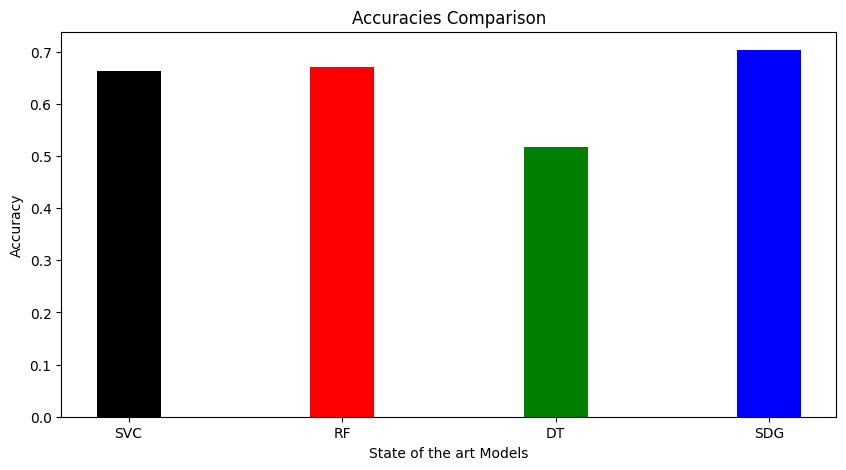

In [65]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'SVC':svc_acc, 'RF':rf_acc, 'DT':dt_acc,'SDG':sdg_acc}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color=['black', 'red', 'green', 'blue'],
		width = 0.3)

plt.xlabel("State of the art Models")
plt.ylabel("Accuracy")
plt.title("Accuracies Comparison")
plt.show()


## Inferencing by loading model

In [58]:
model = pickle.load(open("models/0.703_SGD_Model.sav", 'rb'))
Vectorizer = pickle.load(open("Vectorizer.sav", 'rb'))
print("Model Loaded")
print("Vectorizer Loaded")

stopwords_list = ["اب", "ابھی", "اپنا", "اپنے", "اپنی", "اٹھا", "اس", "اسے", "اسی", "اگر", "ان", "انہوں", "انہی",
                  "انہیں", "انھیں", "او", "اور", "اے", "ایسا", "ایسے", "ایسی", "ایک", "آ", "آتا", "آتے", "آتی", "آگے",
                  "آنا", "آنے", "آنی", "آئے", "آئی", "آئیں", "آیا", "با", "بڑا", "بڑے", "بڑی", "بعد", "بعض", "بلکہ",
                  "بہت", "بھی", "بے", "پاس", "پر", "پہلے", "پھر", "تا", "تاکہ", "تب", "تجھ", "تجھے", "تک", "تم", "تمام",
                  "تمہارا", "تمہارے", "تمھارے", "تمہاری", "تمہیں", "تمھیں", "تھا", "تھے", "تھی", "تھیں", "تو", "تیری",
                  "تیرے", "جا", "جاتا", "جاتی", "جاتے", "جاتی", "جانے", "جانی", "جاؤ", "جائے", "جائیں", "جب", "جس",
                  "جن", "جنہوں", "جنہیں", "جو", "جیسا", "جیسے", "جیسی", "جیسوں", "چاہیئے", "چلا", "چاہے", "چونکہ",
                  "حالاں", "حالانکہ", "دو", "دونوں", "دوں", "دے", "دی", "دیا", "دیں", "دیے", "دیتا", "دیتے", "دیتی",
                  "دینا", "دینے", "دینی", "دیئے", "ڈالا", "ڈالنا", "ڈالنے", "ڈالنی", "ڈالے", "ڈالی", "ذرا", "رکھا",
                  "رکھتا", "رکھتے", "رکھتی", "رکھنا", "رکھنے", "رکھنی", "رکھے", "رکھی", "رہ", "رہا", "رہتا", "رہتے",
                  "رہتی", "رہنا", "رہنے", "رہنی", "رہو", "رہے", "رہی", "رہیں", "زیادہ", "سا", "سامنے", "سب", "سکتا",
                  "سو", "سے", "سی", "شاید", "صرف", "طرح", "طرف", "عین", "کا", "کبھی", "کچھ", "کہہ", "کر", "کرتا",
                  "کرتے", "کرتی", "کرنا", "کرنے", "کرو", "کروں", "کرے", "کریں", "کس", "کسے", "کسی", "کہ", "کہا", "کہے",
                  "کو", "کون", "کوئی", "کے", "کی", "کیا", "کیسے", "کیوں", "کیونکہ", "کیے", "کئے", "گا", "گویا", "گے",
                  "گی", "گیا", "گئے", "گئی", "لا", "لاتا", "لاتے", "ل", "اتی", "لانا", "لانے", "لانی", "لایا", "لائے",
                  "لائی", "لگا", "لگے", "لگی", "لگیں", "لو", "لے", "لی", "لیا", "لیتا", "لیتے", "لیتی", "لیکن", "لیں",
                  "لیے", "لئے", "مجھ", "مجھے", "مگر", "میرا", "میرے", "میری", "میں", "نا", "نہ", "نہایت", "نہیں", "نے",
                  "ہاں", "ہر", "ہم", "ہمارا", "ہمارے", "ہماری", "ہو", "ہوا", "ہوتا", "ہوتے", "ہوتی", "ہوتیں", "ہوں",
                  "ہونا", "ہونگے", "ہونے", "ہونی", "ہوئے", "ہوئی", "ہوئیں", "ہے", "ہی", "ہیں", "و", "والا", "والوں",
                  "والے", "والی", "وہ", "وہاں", "وہی", "وہیں", "یا", "یعنی", "یہ", "یہاں", "یہی", "یہیں"]


Model Loaded
Vectorizer Loaded


In [59]:
def clean_text(text):
    text = normalize_whitespace(text)
    text = remove_punctuation(text)
    text = remove_accents(text)
    text = replace_urls(text)
    text = replace_emails(text)
    text = replace_currency_symbols(text)
    text = normalize_characters(text)
    text = normalize_combine_characters(text)
    text = english_characters_space(text)
    text = digits_space(text)
    text = text.lower()
    text = normalize(text)
    words = text.split()
    words = [word for word in words if not word in stopwords_list]
    text = " ".join(words)
    return text

In [60]:
# text = "آسان کام ہوگا"
text = "آج بہت مزا آیا"
text = clean_text(text)
text = Vectorizer.transform([text])
label = model.predict(text)

In [61]:
label

array([5])

In [62]:
label_keys = ['A', 'D', 'E', 'H', 'P', 'S', 'T']

label_dict = {
    'H': "Joy/Happiness",
    'S': "Sadness",
    'A': "Anger",
    'D': "Disgust",
    'P': "Anticipation",
    'T': "Trust",
    'E': "Surprise",
    'F': "Fear"
}
print("Label of the text is:", label_dict[label_keys[label[0]]])

Label of the text is: Sadness
